<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 04
## Laboratorio Clase 02: Regresión Lineal

### Instrucciones


* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* La escala es de 0 a 4 considerando solo valores enteros.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_cYY_lab_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: IGNACIO JERIA MARRAS
 
__Rol__: 201684022-2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

alt.themes.enable('opaque')
%matplotlib inline

## Ejercicio 1: Diabetes

Realizar análisis de regresión a los datos de diabetes disponibles en scikit-learn

In [2]:
diabetes = datasets.load_diabetes()
print(dir(diabetes))  ## Atributos

['DESCR', 'data', 'data_filename', 'feature_names', 'target', 'target_filename']


In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
diabetes_df = (
    pd.DataFrame(
        diabetes.data,
        columns=diabetes.feature_names
    )
    .assign(prog=diabetes.target)
)

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


#### Pregunta 1 (1 pto):

* ¿Por qué la columna de sexo tiene esos valores?
* ¿Cuál es la columna a predecir?

* La columna sexo tiene esos valores dado que existe una estandarización de los datos, en este caso se puede ver que hay una repetición en la columna sexo, definiendo así un valor (probablemente) para el sexo masculino y femenino.
* La columna a predecir es prog dado que, según la información obtenida en el documento de diabetes, esta columna es la que se obtuvo luego de muchos exámenes a pacientes, por ende, es la que queremos predecir según todos los datos que se entregan

#### Pregunta 2 (1 pto)

Realiza una regresión lineal con todas las _features_ incluyendo intercepto.

In [5]:
X = diabetes_df.drop(columns=["prog"]).values
y = diabetes_df['prog'].values

Ajusta el modelo

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True).fit(X,y) #con eso se modifica y se ajusta el intercepto
regf = reg.coef_.T
print(regf)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


Imprime el intercepto y los coeficientes luego de ajustar el modelo.

In [7]:
print(f"Intercept:\n {reg.intercept_}\n")
print(f"Coefficients: \n {reg.coef_}\n")

Intercept:
 152.1334841628965

Coefficients: 
 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]



Haz una predicción del modelo con los datos `X`.

In [8]:
y_pred = reg.predict(X) 

Calcula e imprime el error cuadrático medio y el coeficiente de determinación de este modelo ajustado.

In [9]:
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(y,y_pred):.2f}\n")

# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(y,y_pred):.2f}")

Mean squared error: 2859.69

Coefficient of determination: 0.52


**Pregunta: ¿Qué tan bueno fue el ajuste del modelo?**

Dado el coeficiente de determinación y el error cuadrático medio y sabiendo que una estimación exacta tiene un valor de 1 y 0 respectivamente, podemos decir que el ajuste no fue el mejor. El coeficiente de determinación nos dice que tan fiable es el ajuste, por lo que si se obtiene un valor relativamente bajo, es un punto a considerar al momento de tomarle fiabilidad al modelo

### Pregunta 3 (2 ptos).

Realizar multiples regresiones lineales utilizando una sola _feature_ a la vez. 

En cada iteración:

- Crea un arreglo `X`con solo una feature filtrando `X`.
- Crea un modelo de regresión lineal con intercepto.
- Ajusta el modelo anterior.
- Genera una predicción con el modelo.
- Calcula e imprime las métricas de la pregunta anterior.

In [10]:
for i in range(X.shape[1]):
    X_i = X[:, np.newaxis, i]  # Protip! Trata de entender este paso por tu cuenta, es muy clever
    regr_i = LinearRegression(fit_intercept=True).fit(X_i,y)
    #regr_i.coef_.T
    y_pred_i = regr_i.predict(X_i)
    print(f"{diabetes_df.columns[i]}:")
    print(f"Intercept:\n {regr_i.intercept_}\n")
    print(f"Coefficients: \n {regr_i.coef_}\n")
    print(f"Mean squared error: {mean_squared_error(y,y_pred_i):.2f}\n")
    print(f"Coefficient of determination: {r2_score(y,y_pred_i):.2f}")        


age:
Intercept:
 152.13348416289605

Coefficients: 
 [304.18307453]

Mean squared error: 5720.55

Coefficient of determination: 0.04
sex:
Intercept:
 152.13348416289594

Coefficients: 
 [69.71535568]

Mean squared error: 5918.89

Coefficient of determination: 0.00
bmi:
Intercept:
 152.1334841628967

Coefficients: 
 [949.43526038]

Mean squared error: 3890.46

Coefficient of determination: 0.34
bp:
Intercept:
 152.13348416289585

Coefficients: 
 [714.7416437]

Mean squared error: 4774.10

Coefficient of determination: 0.19
s1:
Intercept:
 152.13348416289597

Coefficients: 
 [343.25445189]

Mean squared error: 5663.32

Coefficient of determination: 0.04
s2:
Intercept:
 152.1334841628959

Coefficients: 
 [281.78459335]

Mean squared error: 5750.24

Coefficient of determination: 0.03
s3:
Intercept:
 152.13348416289566

Coefficients: 
 [-639.14527932]

Mean squared error: 5005.66

Coefficient of determination: 0.16
s4:
Intercept:
 152.13348416289568

Coefficients: 
 [696.88303009]

Mean squ

**Si tuvieras que escoger una sola _feauture_, ¿Cuál sería? ¿Por qué?**

Usaría la feature "bmi", dado su "mayor" valor en el coeficiente de determinación y su "bajo" error cuadrático medio

Con la feature escogida haz el siguiente gráfico:

- Scatter Plot
- Eje X: Valores de la feature escogida.
- Eje Y: Valores de la columna a predecir (target).
- En color rojo dibuja la recta correspondiente a la regresión lineal (utilizando `intercept_`y `coefs_`).
- Coloca un título adecuado, nombre de los ejes, etc.

Puedes utilizar `matplotlib` o `altair`, el que prefiera.

No handles with labels found to put in legend.


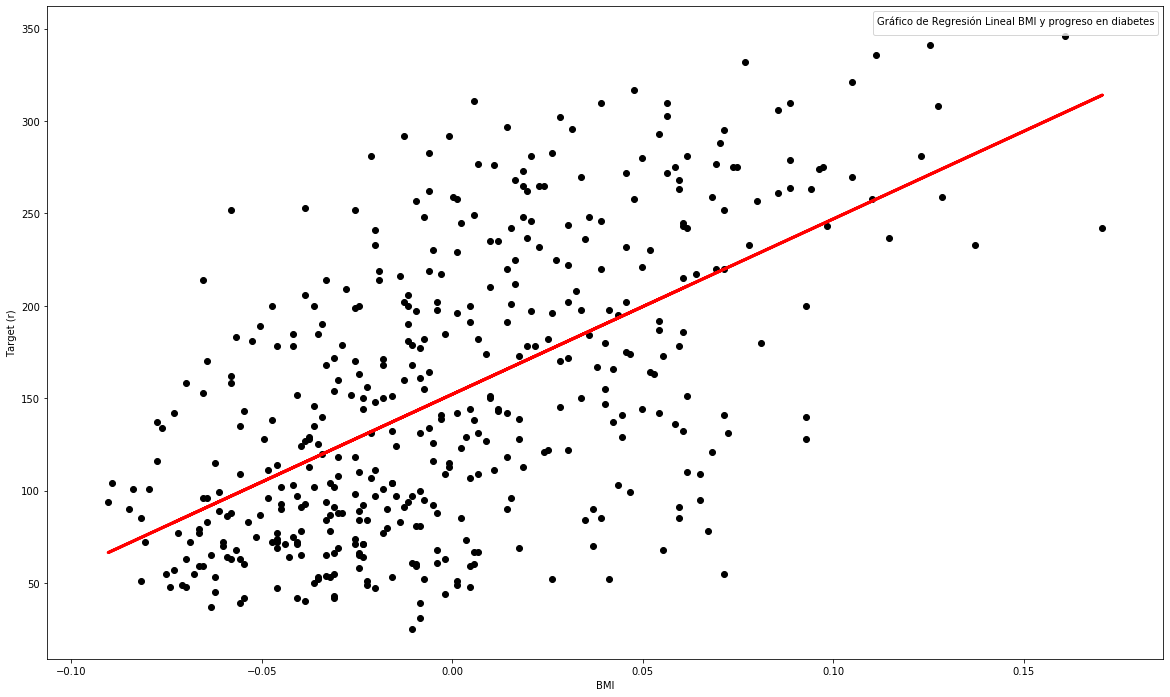

In [11]:
X_2 = X[:,2].reshape(-1,1)
regr_2 = LinearRegression(fit_intercept=True).fit(X_2,y)
y_pred_2 = regr_2.predict(X_2)

plt.figure(figsize=(20, 12))
plt.scatter(X_2, y,  color='black')
plt.plot(X_2, y_pred_2, color='red', linewidth=3)
plt.legend(frameon=True, title="Gráfico de Regresión Lineal BMI y progreso en diabetes")
plt.xlabel("BMI")
plt.ylabel("Target (r)")
plt.show()